In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Cargar dataset ===
df = pd.read_csv("../data/datasets/publications_training_dataset.csv", index_col='gb_id')

print(f"Shape: {df.shape}")
print("\nColumnas:")
print(df.columns.tolist())
df.head()

Shape: (2409, 19)

Columnas:
['title', 'abstract', 'year', 'keywords', 'publication_type', 'language', 'source', 'editorial', 'conference_name', 'jcr_materias', 'citations', 'international_collab', 'num_countries', 'num_foreign_affils', 'num_spanish_affils', 'quartile_value', 'impact_factor', 'percentile', 'label']


,title,abstract,year,keywords,publication_type,language,source,editorial,conference_name,jcr_materias,citations,international_collab,num_countries,num_foreign_affils,num_spanish_affils,quartile_value,impact_factor,percentile,label
gb_id,,,,,,,,,,,,,,,,,,,
346122,Protein tyrosine phosphatase gene (PTPN22) pol...,NaN,2005,RHEUMATOID-ARTHRITIS;SYSTEMIC-LUPUS-ERYTHEMATO...,letter,eng,Journal of Neurology,Springer Nature,NaN,Clinical Neurology,42,1.0,1,0,4,NaN,2.844,80.743,Clinical Neurology
278156,Association of the macrophage migration inhibi...,NaN,2007,SODIUM-INDUCED COLITIS,letter,eng,Gut,BMJ Publishing Group,NaN,Gastroenterology & Hepatology,38,1.0,1,0,8,NaN,10.015,95.000,Gastroenterology & Hepatology
39805,Prp40 and early events in splice site definition,The alternative splicing (AS) of precursor mes...,2016,"Protein Structure, Tertiary;Alternative Splici...",review,eng,Wiley Interdisciplinary Reviews-Rna,Wiley,NaN,Cell Biology,21,1.0,1,0,3,NaN,4.838,72.368,Cell Biology
326575,Lack of association between ankylosing spondyl...,NaN,2006,TYROSINE-PHOSPHATASE PTPN22;R620W POLYMORPHISM,editorial material,eng,Annals of The Rheumatic Diseases,BMJ Publishing Group,NaN,Rheumatology,25,1.0,1,0,5,NaN,5.767,93.478,Rheumatology
39602,Identification of IL12RB1 as a Novel Systemic ...,"[""ObjectiveLumbar spinal stenosis is one of th...",2014,Genetic Predisposition to Disease;Gene Frequen...,editorial material,eng,Arthritis & Rheumatology,Wiley,NaN,Rheumatology,37,7.0,7,17,7,NaN,NaN,NaN,Rheumatology


## 📊 2. Distribución de la variable objetivo (label)

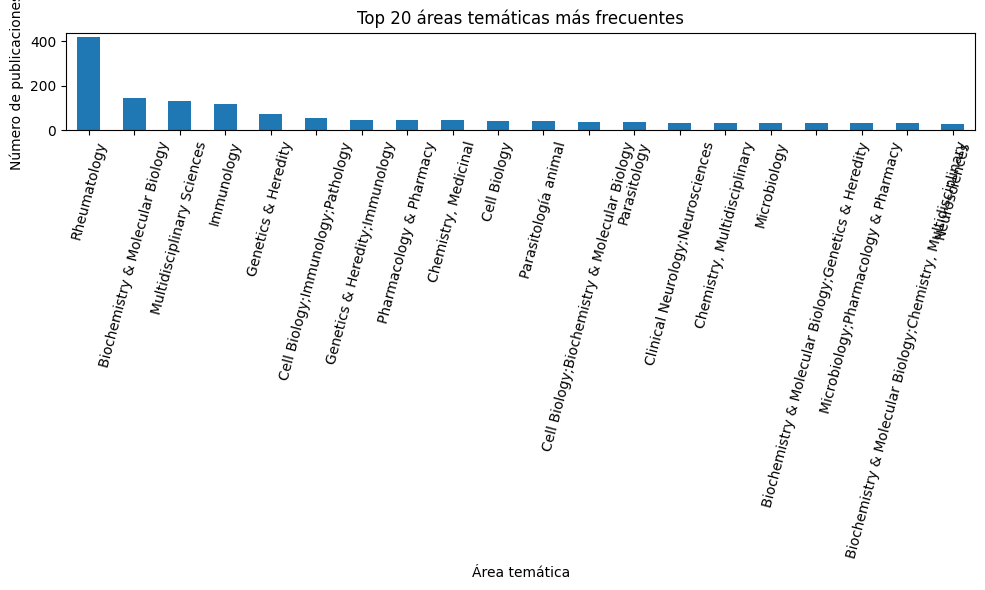


label
Rheumatology                                                     418
Biochemistry & Molecular Biology                                 144
Multidisciplinary Sciences                                       131
Immunology                                                       117
Genetics & Heredity                                               73
Cell Biology;Immunology;Pathology                                 54
Genetics & Heredity;Immunology                                    48
Pharmacology & Pharmacy                                           47
Chemistry, Medicinal                                              47
Cell Biology                                                      44
Parasitología animal                                              43
Cell Biology;Biochemistry & Molecular Biology                     38
Parasitology                                                      38
Clinical Neurology;Neurosciences                                  35
Chemistry, Multidisciplinar

In [65]:
plt.figure(figsize=(10, 6))
df['label'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 áreas temáticas más frecuentes")
plt.xlabel("Área temática")
plt.ylabel("Número de publicaciones")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

print()
print(df['label'].value_counts().head(20))

## 🔄 Etiquetas múltiples por publicación (si aplica)

In [66]:
df['num_labels'] = df['label'].apply(lambda x: len(str(x).split(';')))
print(df['num_labels'].value_counts())

df['is_multilabel'] = df['label'].apply(lambda x: ';' in str(x))
print("Publicaciones con múltiples áreas temáticas:", df['is_multilabel'].sum())

num_labels
1    1511
2     621
3     244
4      31
5       2
Name: count, dtype: int64
Publicaciones con múltiples áreas temáticas: 898


## 🧼 3. Valores nulos

quartile_value     1.000000
conference_name    0.890826
abstract           0.219178
keywords           0.171025
percentile         0.095890
impact_factor      0.092985
jcr_materias       0.089249
editorial          0.003321
dtype: float64


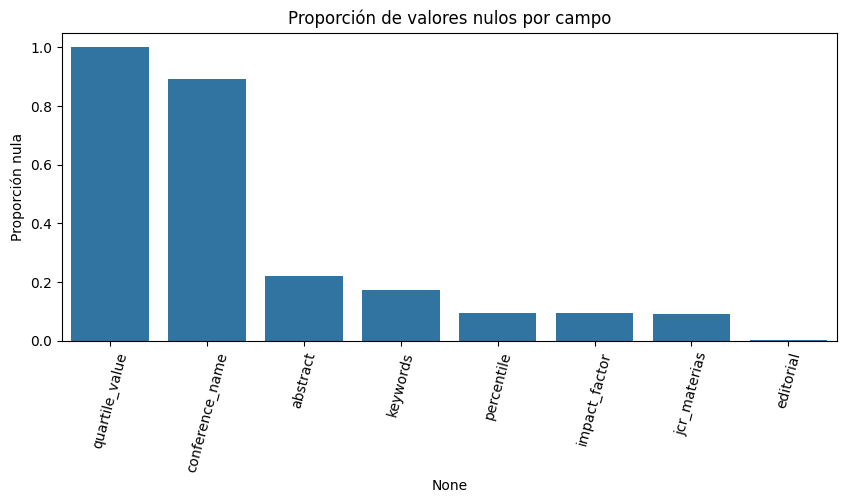

In [67]:
nulls = df.isnull().mean().sort_values(ascending=False)
print(nulls[nulls > 0])

plt.figure(figsize=(10, 4))
sns.barplot(x=nulls[nulls > 0].index, y=nulls[nulls > 0].values)
plt.title("Proporción de valores nulos por campo")
plt.xticks(rotation=75)
plt.ylabel("Proporción nula")
plt.show()

## 🧠 4. Análisis de texto: longitud del título, resumen y keywords

In [68]:
df['title_len'] = df['title'].fillna('').apply(len)
df['abstract_len'] = df['abstract'].fillna('').apply(len)
df['keywords_len'] = df['keywords'].fillna('').apply(lambda x: len(str(x).split(';')))

df[['title_len', 'abstract_len', 'keywords_len']].describe()

,title_len,abstract_len,keywords_len
count,2409.000000,2409.000000,2409.000000
mean,106.254462,1077.316729,10.737235
std,35.006958,710.137884,7.374494
min,16.000000,0.000000,1.000000
25%,82.000000,551.000000,5.000000
50%,103.000000,1222.000000,10.000000
75%,129.000000,1604.000000,15.000000
max,322.000000,4420.000000,43.000000


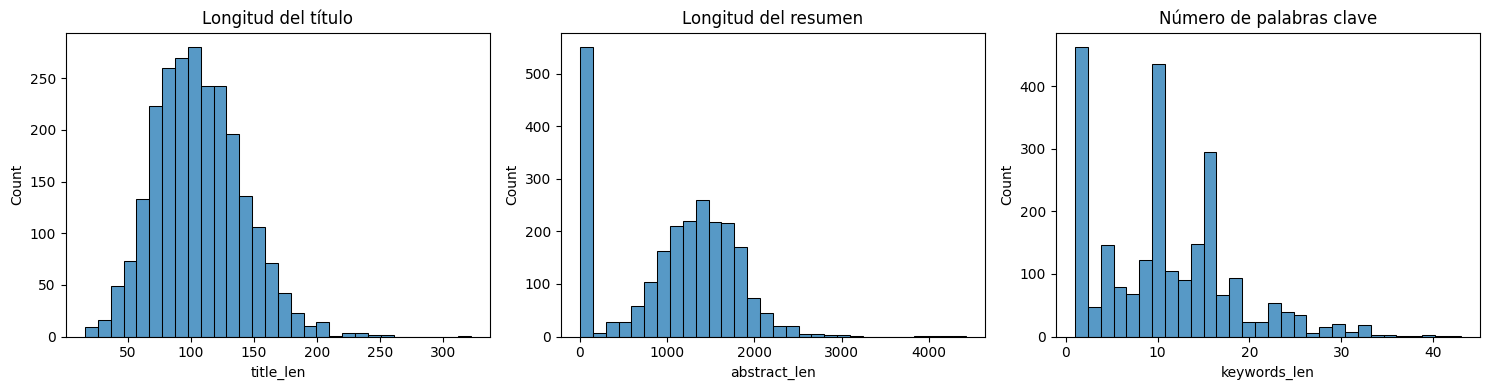

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df['title_len'], bins=30, ax=axes[0])
axes[0].set_title("Longitud del título")
sns.histplot(df['abstract_len'], bins=30, ax=axes[1])
axes[1].set_title("Longitud del resumen")
sns.histplot(df['keywords_len'], bins=30, ax=axes[2])
axes[2].set_title("Número de palabras clave")
plt.tight_layout()
plt.show()


## 🌐 5. Idioma de publicación

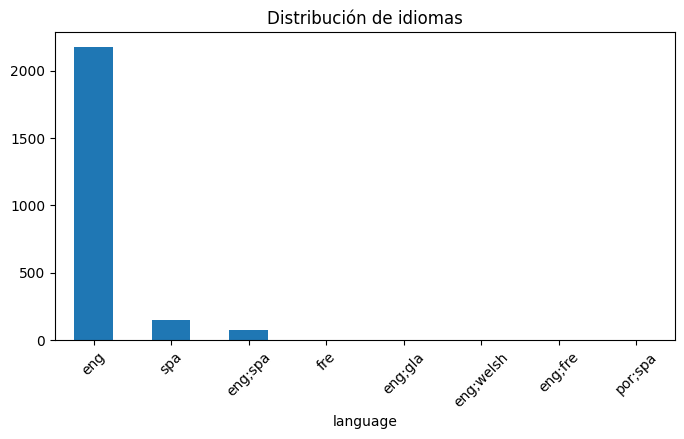


language
eng          2178
spa           146
eng;spa        77
fre             4
eng;gla         1
eng;welsh       1
eng;fre         1
por;spa         1
Name: count, dtype: int64


In [70]:
plt.figure(figsize=(8, 4))
df['language'].value_counts().plot(kind='bar')
plt.title("Distribución de idiomas")
plt.xticks(rotation=45)
plt.show()

print()
print(df['language'].value_counts())

## 🗓️ 6. Distribución temporal

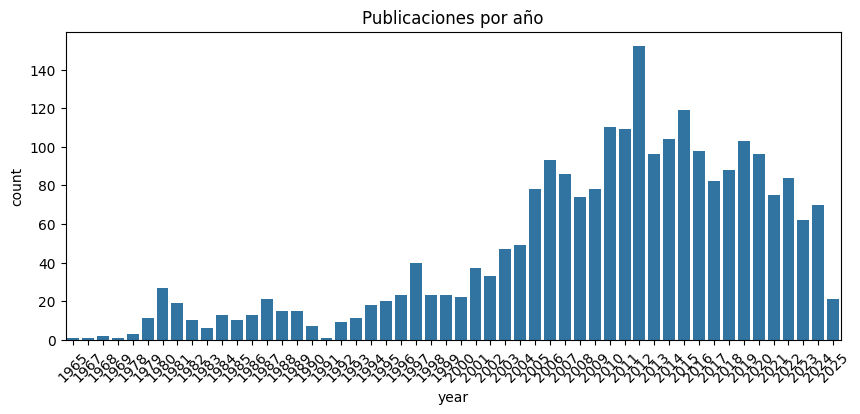

In [71]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="year", order=sorted(df['year'].dropna().unique()))
plt.title("Publicaciones por año")
plt.xticks(rotation=45)
plt.show()

📈 7. Métricas bibliométricas

         citations  impact_factor   percentile
count  2409.000000    2185.000000  2178.000000
mean     38.425073       5.702968    78.437832
std     162.170743       5.448082    17.999206
min       0.000000       0.000000     0.714000
25%       2.000000       2.935000    69.712750
50%      15.000000       4.300000    83.499500
75%      38.000000       6.696000    91.667000
max    5716.000000      91.253000    99.733000


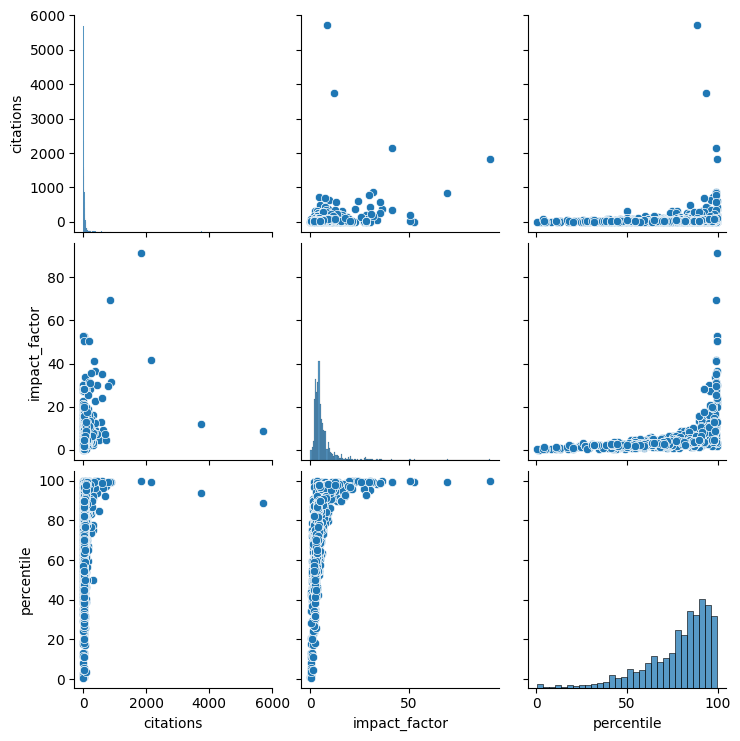

In [72]:
numeric_cols = ['citations', 'impact_factor', 'percentile']
print(df[numeric_cols].describe())

sns.pairplot(df[numeric_cols].dropna())

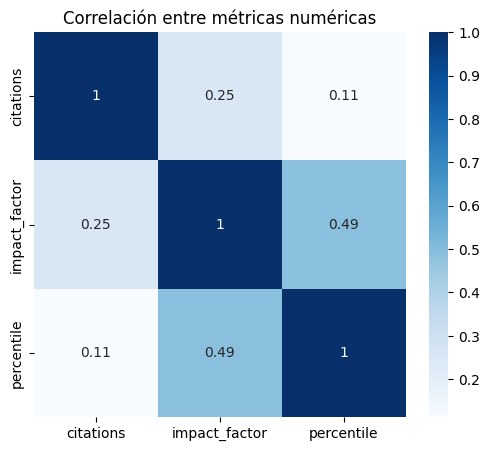

In [73]:
plt.figure(figsize=(6, 5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="Blues")
plt.title("Correlación entre métricas numéricas")
plt.show()


## 🧬 8. Fuente y tipo de publicación

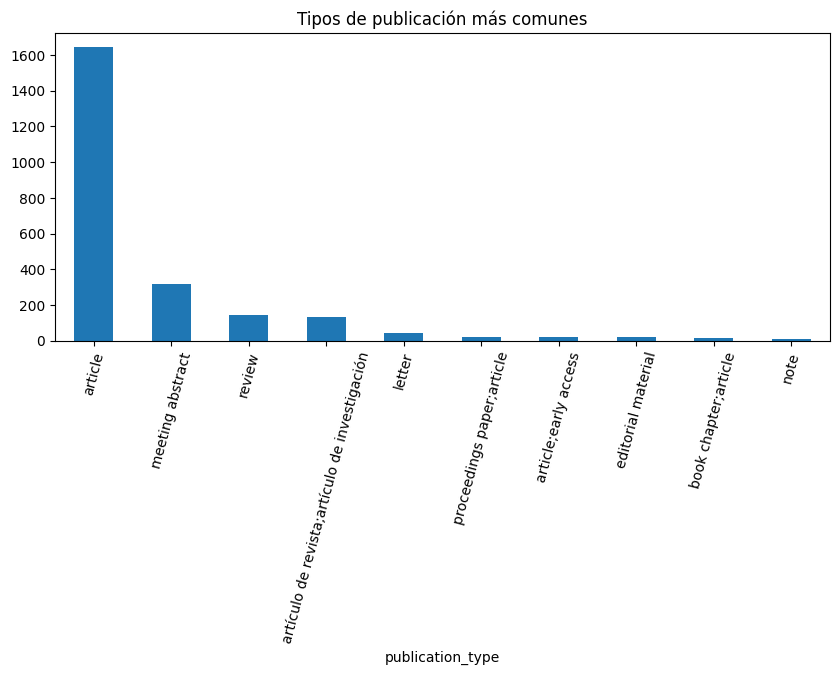


publication_type
article                                                1643
meeting abstract                                        317
review                                                  144
artículo de revista;artículo de investigación           133
letter                                                   43
proceedings paper;article                                23
article;early access                                     20
editorial material                                       19
book chapter;article                                     15
note                                                      9
artículos;artículo                                        7
artículo de revista;nota                                  6
proceedings paper                                         6
conference paper                                          5
article;book chapter                                      3
review;book chapter                                       3
artículo de revista;es

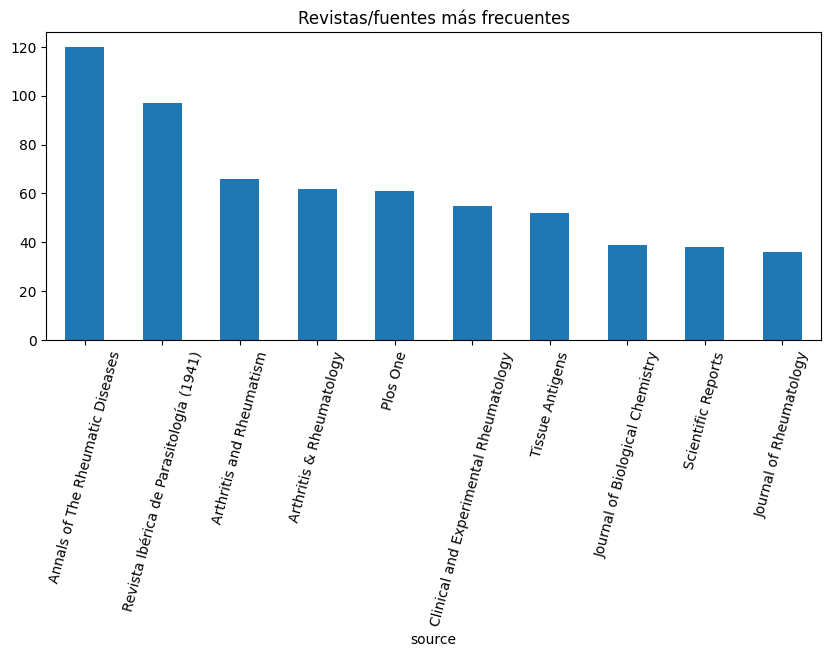


source
Annals of The Rheumatic Diseases           120
Revista Ibérica de Parasitología (1941)     97
Arthritis and Rheumatism                    66
Arthritis & Rheumatology                    62
Plos One                                    61
Clinical and Experimental Rheumatology      55
Tissue Antigens                             52
Journal of Biological Chemistry             39
Scientific Reports                          38
Journal of Rheumatology                     36
Name: count, dtype: int64

editorial
Elsevier                                             457
Wiley                                                363
Oxford University Press                              137
BMJ Publishing Group                                 134
Sociedad Española de Parasitología (sep)              97
Public Library of Science                             93
MDPI                                                  80
Nature Research                                       79
Springer Nature [academic jou

In [74]:
plt.figure(figsize=(10, 4))
df['publication_type'].value_counts().head(10).plot(kind='bar')
plt.title("Tipos de publicación más comunes")
plt.xticks(rotation=75)
plt.show()

print()
print(df['publication_type'].value_counts())

plt.figure(figsize=(10, 4))
df['source'].value_counts().head(10).plot(kind='bar')
plt.title("Revistas/fuentes más frecuentes")
plt.xticks(rotation=75)
plt.show()

print()
print(df['source'].value_counts().head(10))

print()
print(df['editorial'].value_counts().head(20))

In [ ]:
editorial_cumsum = df['editorial'].value_counts(normalize=True).cumsum()
editorial_cumsum = editorial_cumsum.reset_index()
editorial_cumsum.columns = ['editorial', 'cumulative_proportion']
editorial_cumsum[editorial_cumsum['cumulative_proportion'] <= 0.8]


## Correlación con la variable label

In [75]:
from scipy.stats import chi2_contingency, f_oneway

df['label'] = df['label'].astype(str).str.strip()

In [76]:
# === 3. CHI-CUADRADO: label vs variables categóricas ===

def chi_square_test(cat_column):
    print(f"\n🔹 Chi-cuadrado entre 'label' y '{cat_column}':")
    contingency = pd.crosstab(df['label'], df[cat_column])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"  χ² = {chi2:.2f}, p = {p:.4f}, dof = {dof}")
    if p < 0.05:
        print("  → Hay dependencia estadísticamente significativa.")
    else:
        print("  → No hay evidencia de dependencia significativa.")

chi_square_test("language")
chi_square_test("publication_type")
chi_square_test("source")
chi_square_test("editorial")


🔹 Chi-cuadrado entre 'label' y 'language':
  χ² = 4845.54, p = 0.0000, dof = 1995
  → Hay dependencia estadísticamente significativa.

🔹 Chi-cuadrado entre 'label' y 'publication_type':
  χ² = 21607.16, p = 0.0000, dof = 7695
  → Hay dependencia estadísticamente significativa.

🔹 Chi-cuadrado entre 'label' y 'source':
  χ² = 585815.70, p = 0.0000, dof = 171855
  → Hay dependencia estadísticamente significativa.

🔹 Chi-cuadrado entre 'label' y 'editorial':
  χ² = 114384.00, p = 0.0000, dof = 31360
  → Hay dependencia estadísticamente significativa.


## Vamos a ver el dataset de test

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Cargar dataset ===
df = pd.read_csv("../data/datasets/publications_to_predict_dataset.csv", index_col='gb_id')

print(f"Shape: {df.shape}")
print("\nColumnas:")
print(df.columns.tolist())
df.head()

Shape: (1114, 19)

Columnas:
['title', 'abstract', 'year', 'keywords', 'publication_type', 'language', 'source', 'editorial', 'conference_name', 'jcr_materias', 'citations', 'international_collab', 'num_countries', 'num_foreign_affils', 'num_spanish_affils', 'quartile_value', 'impact_factor', 'percentile', 'label']


,title,abstract,year,keywords,publication_type,language,source,editorial,conference_name,jcr_materias,citations,international_collab,num_countries,num_foreign_affils,num_spanish_affils,quartile_value,impact_factor,percentile,label
gb_id,,,,,,,,,,,,,,,,,,,
157196,Generation of lymphocyte antigen receptor dive...,V(D)J recombination is the assembly of gene se...,2013,NaN,short survey,eng;spa,Inmunologia,Ediciones Ergon Sa,NaN,NaN,0,1.0,1,0,1,NaN,NaN,NaN,NaN
326573,The potential effect of cortistatin on endotox...,NaN,2006,NaN,note,eng,Modern Aspects of Immunobiology,Ia Verlag,NaN,NaN,0,1.0,1,0,1,NaN,NaN,NaN,NaN
912201,Pr77 and L1TcRz: A dual system within the 5′-e...,The sequence corresponding to the first 77 nuc...,2012,Retrotransposon;Mammalian CPEB3 ribozyme;Retro...,carta al editor;artículos,eng;spa,Mobile Genetic Elements,Taylor and Francis,NaN,NaN,11,1.0,1,0,3,NaN,NaN,NaN,NaN
515752,Molecular mechanisms underlying LRRK2-mediated...,NaN,2022,NaN,libros completos;tesis doctoral/tfm/tfg,eng,Molecular Mechanisms Underlying Lrrk2-Mediated...,Universidad de Granada. Tesis Doctorales,NaN,NaN,0,2.0,2,1,1,NaN,NaN,NaN,NaN
570968,UNA VISIÓN GLOBAL DE LA PANDEMIA COVID-19: Qué...,NaN,2020,NaN,libros completos;libro de divulgación,spa,Una Visión Global de la Pandemia Covid-19: Qué...,Consejo Superior de Investigaciones Científicas,NaN,NaN,0,1.0,1,0,34,NaN,NaN,NaN,NaN


In [78]:
print()
print(df['editorial'].value_counts().head(20))


editorial
Elsevier                          22
BMJ Publishing Group              11
Springer                          11
Wiley                              8
BioMed Central                     8
Ediciones Ergon Sa                 5
Hindawi                            5
Instituto Nacional de Salud        5
Public Library of Science          5
Nova Science Publishers            4
Lippincott, Williams & Wilkins     4
Universidad de Granada             4
Springer Publishing Company        3
Crc Press                          2
Fundación Bbva                     2
Baishideng Publishing Group        2
Kernel Press                       2
Nature Research                    1
Pacini Editore Spa                 1
SAGE Publications                  1
Name: count, dtype: int64


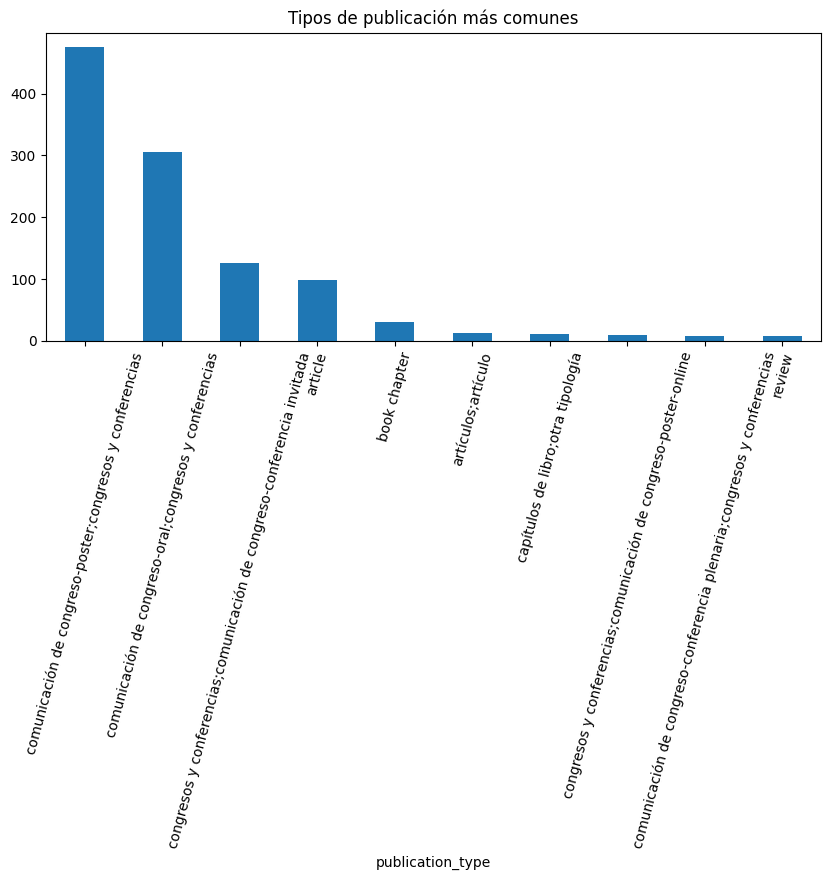


publication_type
comunicación de congreso-poster;congresos y conferencias                         475
comunicación de congreso-oral;congresos y conferencias                           305
congresos y conferencias;comunicación de congreso-conferencia invitada           126
article                                                                           98
book chapter                                                                      31
artículos;artículo                                                                12
capítulos de libro;otra tipología                                                 11
congresos y conferencias;comunicación de congreso-poster-online                   10
comunicación de congreso-conferencia plenaria;congresos y conferencias             8
review                                                                             8
congresos y conferencias;comunicación de congreso-oral-online                      4
editorial                                      

In [79]:
plt.figure(figsize=(10, 4))
df['publication_type'].value_counts().head(10).plot(kind='bar')
plt.title("Tipos de publicación más comunes")
plt.xticks(rotation=75)
plt.show()

print()
print(df['publication_type'].value_counts())

Tenemos que quitar publication_type... Porque no son nada parecidos entre ambos datasets, el modelo no puede tener en cuenta esto para aprender.

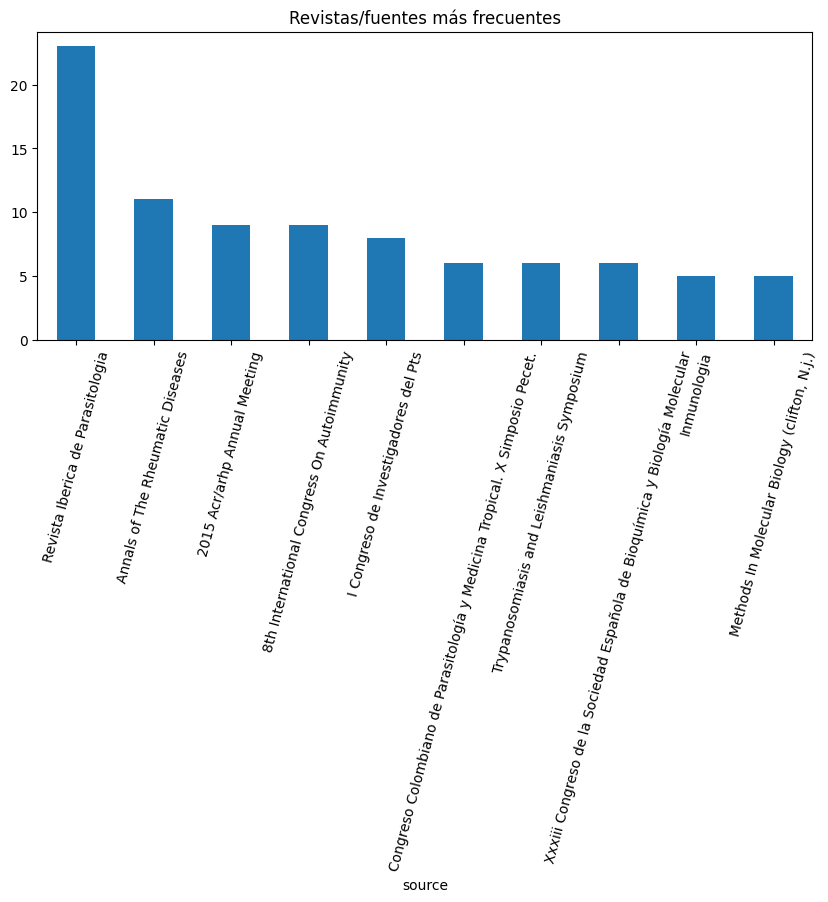


source
Revista Iberica de Parasitologia                                               23
Annals of The Rheumatic Diseases                                               11
2015 Acr/arhp Annual Meeting                                                    9
8th International Congress On Autoimmunity                                      9
I Congreso de Investigadores del Pts                                            8
Congreso Colombiano de Parasitología y Medicina Tropical. X Simposio Pecet.     6
Trypanosomiasis and Leishmaniasis Symposium                                     6
Xxxiii Congreso de la Sociedad Española de Bioquímica y Biología Molecular      6
Inmunologia                                                                     5
Methods In Molecular Biology (clifton, N.j.)                                    5
Name: count, dtype: int64


In [80]:
plt.figure(figsize=(10, 4))
df['source'].value_counts().head(10).plot(kind='bar')
plt.title("Revistas/fuentes más frecuentes")
plt.xticks(rotation=75)
plt.show()

print()
print(df['source'].value_counts().head(10))